In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.bloomberg.com/green"
headers = {'User-Agent': 'Mozilla/5.0'}
resp = requests.get(url, headers=headers)
soup = BeautifulSoup(resp.content, 'html.parser')

headlines = []
for div in soup.find_all('div', attrs={'data-testid': 'headline'}):
    span = div.find('span')
    if span:
        text = span.get_text(strip=True)
        if text:
            headlines.append(text)

# Convert to DataFrame
df_bloomberg = pd.DataFrame(headlines, columns=["headline"])
df_bloomberg.head(10)
#df = pd.concat([df_bloomberg], ignore_index=True)



,headline
0,Declining Climate Funding Spurs Index of Most ...
1,JPMorgan Touts Returns From Protecting Against...
2,Clear Plans Needed to Deploy Climate Adaptatio...
3,Toxic Smoke Damage in LA Homes Deepens Insuran...
4,Hedge Funds Face California Rebuke Over Role i...
5,How Wildfires Upended California’s Insurance M...
6,California Levies $1 Billion Assessment on Ins...
7,Solar Stocks Soar as GOP Mulls Changes to Tax ...
8,Brazil's Green-Energy Industry Is Falling Vict...
9,Singapore Airlines Flags Climate-Related Costs...


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.esgtoday.com/"
headers = {'User-Agent': 'Mozilla/5.0'}
resp = requests.get(url, headers=headers)
soup = BeautifulSoup(resp.content, 'html.parser')

headlines = []

for h4 in soup.find_all('h4', class_='post-title entry-title'):
    a = h4.find('a')
    if a and a.text.strip():
        title = a.text.strip()
        headlines.append(title)

df_esgtoday = pd.DataFrame(headlines, columns=["headline"])
df_esgtoday

,headline
0,Microsoft Signs Deal for 4.8 Million Tons of C...
1,UK Releases Proposed Sustainability and Climat...
2,Guest Post – The Climate Solutions Paradox: Wh...
3,JPMorganChase Signs 10-Year DAC Carbon Removal...
4,IFRS Publishes Guidance to Support Disclosure ...


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define URL and headers
url = "https://trellis.net"
headers = {'User-Agent': 'Mozilla/5.0'}

# Send GET request
resp = requests.get(url, headers=headers)
soup = BeautifulSoup(resp.content, 'html.parser')

# Extract only the headline texts inside <h2 class="text-2xl"> within <a class="link">
headlines = []
for a in soup.find_all('a', class_='link'):
    h2 = a.find('h2', class_='text-2xl')
    if h2 and h2.text.strip():
        title = h2.text.strip()
        headlines.append(title)

# Create DataFrame
df_trellis = pd.DataFrame(headlines, columns=["headline"])

# Display DataFrame
print(df_trellis)


                                            headline
0  Why Norfolk Southern restored a 1,500-foot str...
1  Lessons From the Biggest Carbon Removal Purcha...
2  Can Dairy Lead the Way? Sustainability Action ...
3  From Complexity to Clarity: Simplifying Supply...
4                     Where Climate Meets Technology
5       A Guide to Electricity Purchasing Strategies
6  Lessons From the Biggest Carbon Removal Purcha...
7  Can Dairy Lead the Way? Sustainability Action ...
8  From Complexity to Clarity: Simplifying Supply...
9                     Where Climate Meets Technology


In [ ]:
#df = pd.concat([df_bloomberg,df_esgtoday,df_trellis],ignore_index=True)
#df = pd.concat([df_trellis],ignore_index=True)
df = pd.concat([df_esgtoday,df_trellis],ignore_index=True)
print(df)

                                             headline
0   Microsoft Signs Deal for 4.8 Million Tons of C...
1   UK Releases Proposed Sustainability and Climat...
2   Guest Post – The Climate Solutions Paradox: Wh...
3   JPMorganChase Signs 10-Year DAC Carbon Removal...
4   IFRS Publishes Guidance to Support Disclosure ...
5   Why Norfolk Southern restored a 1,500-foot str...
6   Lessons From the Biggest Carbon Removal Purcha...
7   Can Dairy Lead the Way? Sustainability Action ...
8   From Complexity to Clarity: Simplifying Supply...
9                      Where Climate Meets Technology
10       A Guide to Electricity Purchasing Strategies
11  Lessons From the Biggest Carbon Removal Purcha...
12  Can Dairy Lead the Way? Sustainability Action ...
13  From Complexity to Clarity: Simplifying Supply...
14                     Where Climate Meets Technology


In [ ]:
#df = pd.concat([df_reuters, df_bloomberg, df_esgtoday], ignore_index=True)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Label dummy data for now (for testing): In real use-case, you'll need annotated labels or use pre-trained model
df['label'] = ['positive' if 'boost' in h.lower() or 'fund' in h.lower() else 'negative' for h in df['headline']]

X = df['headline']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression()
clf.fit(X_train_vec, y_train)

y_pred = clf.predict(X_test_vec)
print(classification_report(y_test, y_pred))


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'negative'

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
df['sentiment'] = df['headline'].apply(lambda x: sentiment_pipeline(x)[0]['label'])


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

vectorizer = CountVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(df['headline'])

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_vec)

df['cluster'] = clusters


In [ ]:
for i in range(5):
    cluster_words = X_vec[clusters == i].toarray().sum(axis=0)
    top_words = [word for idx, word in sorted(zip(cluster_words, vectorizer.get_feature_names_out()), reverse=True)[:5]]
    print(f"Cluster {i} top words: {top_words}")


Cluster 0 top words: ['virginia', 'stretch', 'southern', 'shoreline', 'restored']
Cluster 1 top words: ['climate', 'technology', 'supply', 'simplifying', 'meets']
Cluster 2 top words: ['tons', 'signs', 'removal', 'million', 'microsoft']
Cluster 3 top words: ['way', 'sustainability', 'reduction', 'plans', 'methane']
Cluster 4 top words: ['year', 'removal', 'carbon', 'purchases', 'lessons']


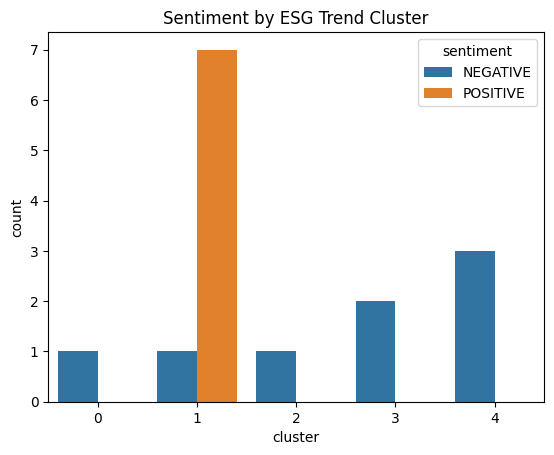

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='cluster', hue='sentiment')
plt.title("Sentiment by ESG Trend Cluster")
plt.show()


In [ ]:
import re

def extract_company(text):
    matches = re.findall(r"\b[A-Z][a-z]+(?: [A-Z][a-z]+)?\b", text)
    return matches[0] if matches else 'Unknown'

df['company'] = df['headline'].apply(extract_company)


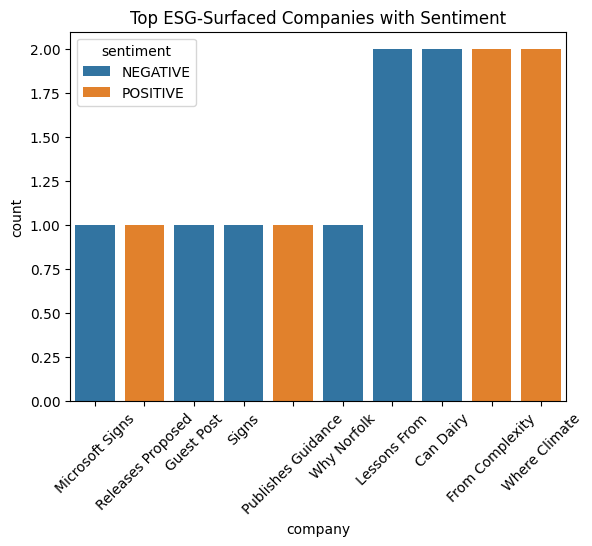

In [ ]:
top_companies = df['company'].value_counts().head(10).index
sns.countplot(data=df[df['company'].isin(top_companies)], x='company', hue='sentiment')
plt.xticks(rotation=45)
plt.title("Top ESG-Surfaced Companies with Sentiment")
plt.show()


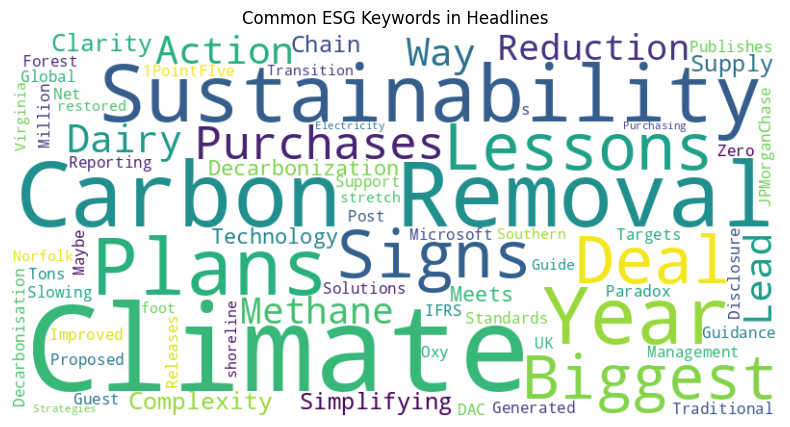

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_blob = ' '.join(df['headline'].tolist())  # Assuming df contains your headlines

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_blob)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common ESG Keywords in Headlines")
plt.show()


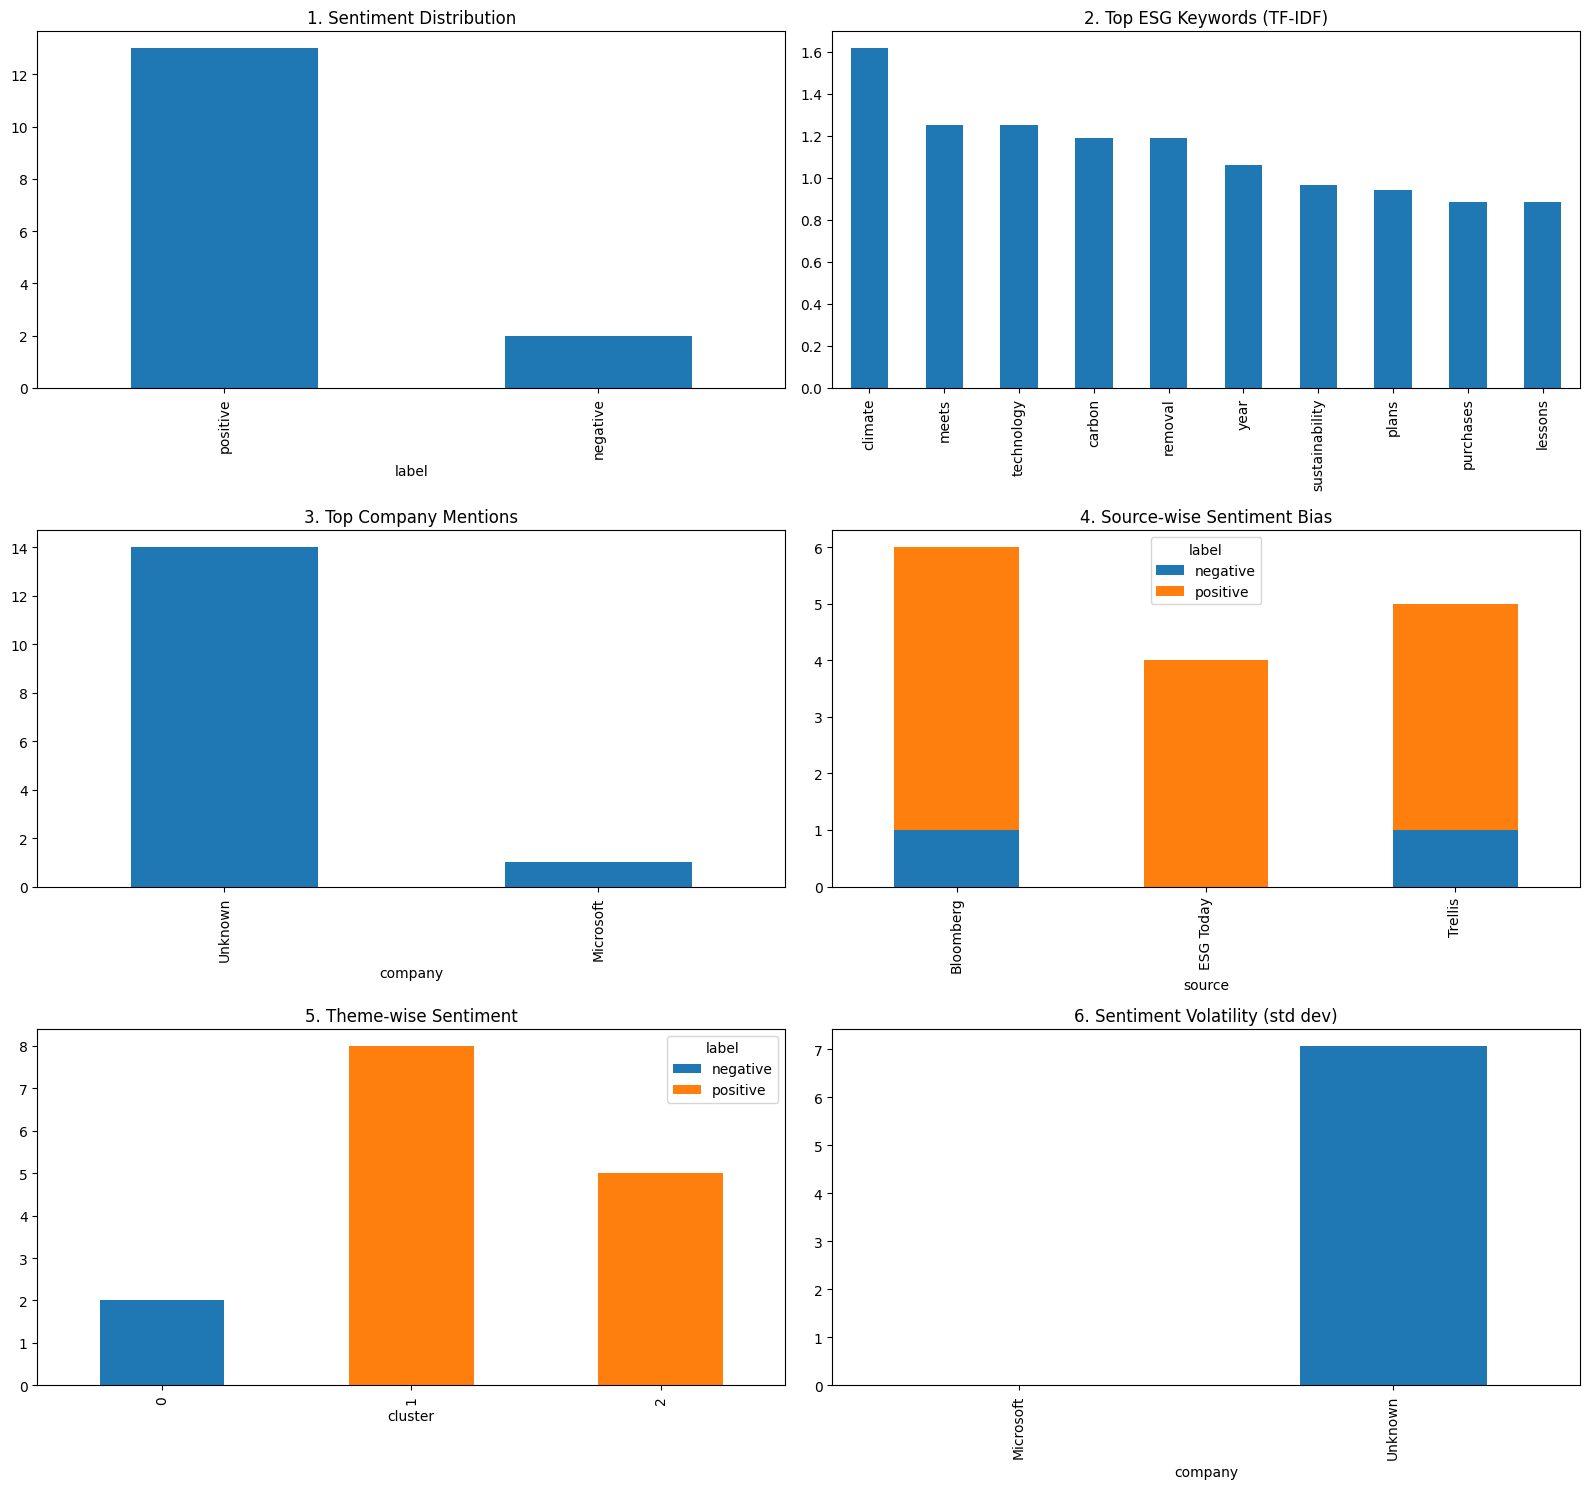

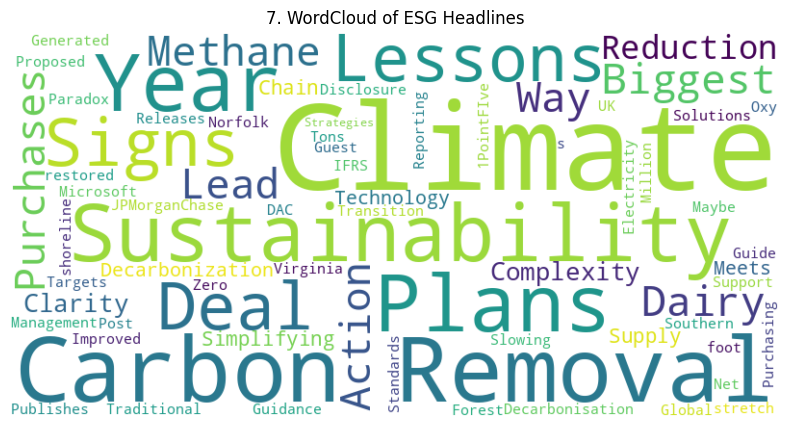

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import numpy as np

# Step 1: TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['headline'])

# Step 2: Dummy Sentiment using KMeans
df['label'] = KMeans(n_clusters=2, random_state=0).fit_predict(X)
label_map = {0: 'negative', 1: 'positive'}
df['label'] = df['label'].map(label_map)

# Step 3: Train Logistic Regression for future predictions
clf = LogisticRegression()
clf.fit(X, df['label'])
df['predicted'] = clf.predict(X)

# Step 4: Top Keywords
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
top_keywords = tfidf_df.sum().sort_values(ascending=False).head(10)

# Step 5: Clustering Headlines
df['cluster'] = KMeans(n_clusters=3, random_state=0).fit_predict(X)

# Step 6: Simulated Source Bias
np.random.seed(0)
df['source'] = np.random.choice(['Bloomberg', 'ESG Today', 'Trellis'], size=len(df))
source_sentiment = df.groupby('source')['label'].value_counts().unstack().fillna(0)

# Step 7: Simulated Company Mentions
companies = ['Microsoft', 'Amazon', 'Google', 'Tesla', 'Chevron', 'Facebook']
df['company'] = df['headline'].apply(lambda h: next((c for c in companies if c.lower() in h.lower()), 'Unknown'))
company_mentions = df['company'].value_counts().head(10)

# Step 8: Sentiment per Cluster
theme_sentiment = df.groupby('cluster')['label'].value_counts().unstack().fillna(0)

# Step 9: Sentiment Volatility
sentiment_volatility = df.groupby('company')['label'].value_counts().unstack().std(axis=1)

# Step 10: WordCloud
text = ' '.join(df['headline'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# 📊 PLOTS
fig, axs = plt.subplots(3, 2, figsize=(16, 15))

df['label'].value_counts().plot(kind='bar', ax=axs[0, 0], title='1. Sentiment Distribution')
top_keywords.plot(kind='bar', ax=axs[0, 1], title='2. Top ESG Keywords (TF-IDF)')
company_mentions.plot(kind='bar', ax=axs[1, 0], title='3. Top Company Mentions')
source_sentiment.plot(kind='bar', stacked=True, ax=axs[1, 1], title='4. Source-wise Sentiment Bias')
theme_sentiment.plot(kind='bar', stacked=True, ax=axs[2, 0], title='5. Theme-wise Sentiment')
sentiment_volatility.plot(kind='bar', ax=axs[2, 1], title='6. Sentiment Volatility (std dev)')

plt.tight_layout()
plt.show()

# BONUS WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('7. WordCloud of ESG Headlines')
plt.show()
